# Fit a quadratic function in 2D

Here, we are going to sample a quadratic function of this type
$$
y = a\cdot x_1^2 + b\cdot x_2^2 + c\cdot x_1\cdot x_2 + d\cdot x_1 + e\cdot x_2 + f
$$
where $a$, $b$, $c$, $d$, $e$ and $f$ are parameters and ($x_1$, $x_2$) are the two features.

NOTE: this example skips the explanation of common steps. Refer to `examples/linear_1D` and `examples/quadratic_1D` for detailed comments on each step. Have a look at `*.yaml` files in the main root for additional information about the parameters to use and the possible choices.

### Load libraries and initialise relevant classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from emu_like.datasets import DataCollection
from emu_like.ffnn_emu import FFNNEmu

2025-07-14 16:45:11.528909: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 16:45:11.529346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 16:45:11.531294: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 16:45:11.536778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752504311.546987  193693 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752504311.54

In [2]:
data = DataCollection()
emu = FFNNEmu()

### Generate the sample

In [3]:
# Features
params = {
 'x1': {
      'prior': {
          'min': -80.,
          'max': 80.,
      },
  },
  'x2': {
      'prior': {
          'min': -80.,
          'max': 80.,
      },
  },
 }

# Arguments
y_args = {
  'a': 1.,
  'b': 2.,
  'c': 1.,
  'd': -18.,
  'e': -37.,
  'f': 196.,

}

In [4]:
data.sample(
    params=params,
    x_name='grid',
    x_args={'n_samples': 1000},
    y_name='quadratic_2d',
    y_args=y_args,
    verbose=True)

[info] Generating dataset.
[info] Initializing Grid sampler.
----> Number of samples: 1000
[info] Initializing Quadratic2D model.


100%|██████████| 961/961 [00:00<00:00, 549894.43it/s]


In [5]:
data = data.get_one_y_dataset()

data.train_test_split(
    frac_train=0.9,
    seed=1567,
    verbose=True)

[info] Splitting dataset in training and testing samples.
----> Fractional number of training samples: 0.9
----> Random seed for train/test split: 1567


In [6]:
data.rescale(
    rescale_x = 'MinMaxScaler',
    rescale_y = 'MinMaxScaler',
    verbose=True)

[info] Rescaling x and y.
----> x with: MinMaxScaler
----> y with: MinMaxScaler
----> Rescaled bounds:
--------> x_train_0 = [0.0, 1.0]
--------> x_train_1 = [0.0, 1.0]
--------> x_test_0 = [0.0, 1.0]
--------> x_test_1 = [0.0, 1.0]
--------> y_train_0 = [0.0, 1.0]
--------> y_test_0 = [0.0038878416588124364, 0.7955937794533459]


### Build and train the emulator

In [7]:
params = {
    'activation': 'relu',
    'neurons_hidden': [50, 50],
    'batch_normalization': False,
    'dropout_rate': 0.,
    'batch_size': 32,
    'optimizer': 'adam',
    'loss': 'mean_squared_error',
    'want_output_layer': True,
    'data_n_x': data.n_x,
    'data_n_y': data.n_y,
}

In [8]:
emu.build(
    params,
    verbose=True)

[info] Building FFNN architecture
----> Activation function: relu
----> Dropout rate: 0.0
----> Optimizer: adam
----> Loss function: mean_squared_error


2025-07-14 16:45:12.431284: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 50)               │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 50)               │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613 - val_loss: 0.0370
Epoch 2/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - val_loss: 0.0292
Epoch 3/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 4/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187 - val_loss: 0.0169
Epoch 5/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 - val_loss: 0.0139
Epoch 6/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 7/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0109
Epoch 8/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0089
Epoch 9/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0089
Epoch 10/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0068
Epoch 11/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0060
Epoch 12/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

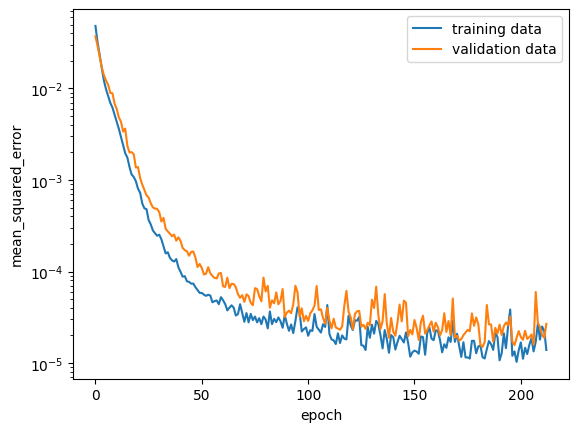

In [9]:
emu.train(
    data,
    epochs=2000,
    learning_rate=1.e-3,
    path=None,
    get_plot=True,
    verbose=True)

Epoch 214/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8497e-06 - val_loss: 1.4826e-05
Epoch 215/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7022e-06 - val_loss: 1.5568e-05
Epoch 216/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4095e-06 - val_loss: 1.5234e-05
Epoch 217/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0487e-06 - val_loss: 1.4574e-05
Epoch 218/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8260e-06 - val_loss: 1.4680e-05
Epoch 219/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0272e-06 - val_loss: 1.4468e-05
Epoch 220/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9685e-06 - val_loss: 1.4571e-05
Epoch 221/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5116e-06 - val_loss: 1.5626e-05
Epoch 222/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7959e-06 - val_loss: 1.4713e-05
Epoch 223/2213
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0801e-06 - val_loss: 1.5088e-05
Epoch 224/2213
27/27 ━━━━━━━━━━━━━━━━━━━

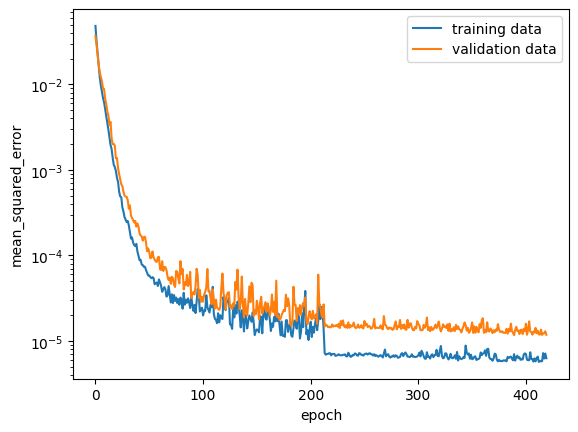

In [10]:
emu.train(
    data,
    epochs=2000,
    learning_rate=1.e-4,
    path=None,
    get_plot=True,
    verbose=True)

### Testing the result

In [11]:
y_emu = np.array([emu.eval(x) for x in data.x])

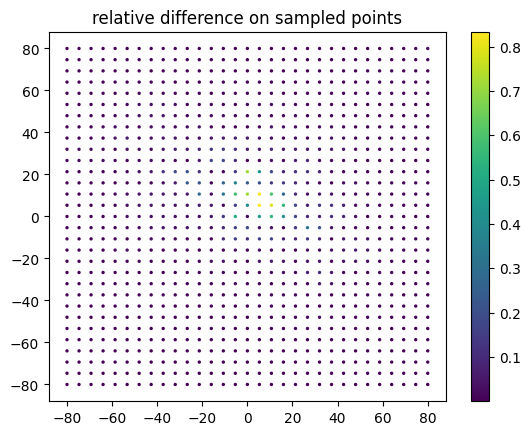

In [12]:
plt.scatter(data.x[:, 0], data.x[:, 1], c=np.abs(data.y[:,0]/y_emu[:,0]-1.), s=2)
plt.title('relative difference on sampled points')
plt.colorbar()

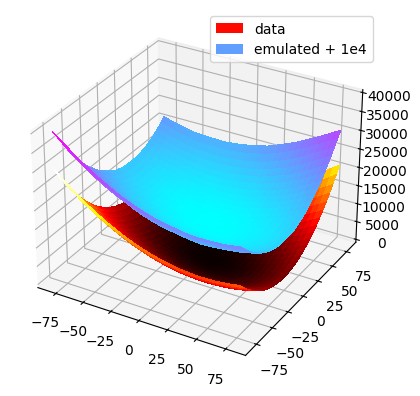

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
size = int(np.sqrt(data.x[:, 0].shape[0]))
X = np.reshape(data.x[:, 0], (size, size))
Y = np.reshape(data.x[:, 1], (size, size))
Z_data = np.reshape(data.y[:, 0], (size, size))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_data, cmap=cm.hot,
                       linewidth=0, antialiased=False,
                       label='data')


# Make data.
Z_emu = np.reshape(y_emu[:, 0], (size, size))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_emu+1.e4, cmap=cm.cool,
                       linewidth=0, antialiased=False,
                       label='emulated + 1e4')

plt.legend()
plt.show()
